In [ ]:
%cd /
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ ./mydrive
!ls mydrive

/
Mounted at /content/gdrive
 8e8a8dbac13b433f7eb809f5dac15c12.png	  komurki.jpg	     obrazek_w_1.jpg
'Arkusz kalkulacyjny bez tytułu.gsheet'   kwiat_szum_1.jpg   plaza.jpg
 at.jpeg				  lema.jpg	     polska.jpg
 butelki.jpg				  lena.bmp	     polsza.jpeg
'Colab Notebooks'			  lena.jpg	     siuuuuuuuuuuu
 jpg					 'My Drive'	     statek.jpg


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import skimage, imutils
img = cv2.imread('/mydrive/jpg/dog.png')
L = img.max()
neg = L - img
#cv2_imshow(img)
#cv2_imshow(neg)

In [ ]:
#dodawanie obrazow do siebie
#najpierw należy zresizować oba do jednego obrauz a następnie mozemy je do siebie dodać 
#w addWeighted ,a,u tak (obraz1,jasnosc1,obraz2,jasnosc2,gamma calosci)
img_1 = cv2.imread('/mydrive/jpg/most.png')
img_2 = cv2.imread('/mydrive/jpg/wier.png')

img_1_resize = cv2.resize(img_1,(640,480))
img_2_resize = cv2.resize(img_2,(640,480))
img_add = cv2.addWeighted(img_1_resize, 0.5, img_2_resize,0.6,0)
#cv2_imshow(img_add)

In [ ]:
# orbót obrazka o kąt 90, 180 stopni
img_1_resized = cv2.resize(img_1,(240,140))
img_r = cv2.rotate(img_1_resized,cv2.ROTATE_90_COUNTERCLOCKWISE)
#cv2_imshow(img_r)
# obrót obrazka 0 wybrany kąt
M = cv2.getRotationMatrix2D((140,70),120,1)
img_ro = cv2.warpAffine(img_1_resized,M,(240,140))
#cv2_imshow(img_ro)
# obrót o wybrany kont z wykorzystaniem innej biblioteki 
img_ro = imutils.rotate_bound(img_1_resized,60)
#cv2_imshow(img_ro)

In [ ]:
# zamiana obrazu z koloru do skali szarości
img_1_resized = cv2.resize(img_1,(340,240))
img_2_resized = cv2.resize(img_2,(340,240))
img_gray1 = cv2.cvtColor(img_1_resized,cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img_2_resized,cv2.COLOR_BGR2GRAY)

#cv2_imshow(img_gray1)
#cv2_imshow(img_gray2)

In [ ]:
# wykonania binaryzacji
thresh = 200
max_value = 255
res,th = cv2.threshold(img_1_resized,thresh,max_value,cv2.THRESH_BINARY_INV)
res,th2 = cv2.threshold(img_1_resized,thresh,max_value,cv2.THRESH_BINARY)
#cv2_imshow(th)
#cv2_imshow(th2) 
#w adaptive threshholdach zdjecie przesyłane w funkcji musi być w odcieniach szarości (w sumie ja kwszystko bo komputer to mulnik krab)
#ziutowe
th3 = cv2.adaptiveThreshold(img_gray2, max_value, cv2.ADAPTIVE_THRESH_MEAN_C, 
                            cv2.THRESH_BINARY, 5, 2)
#cv2_imshow(th3)
#gausowskie
th4 = cv2.adaptiveThreshold(img_gray2, max_value,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,21,10)
#cv2_imshow(th4)
#otsu
res5, th5 = cv2.threshold(img_gray2, thresh, max_value, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#cv2_imshow(th5)

In [ ]:
#stworzenie maski i wycięcie obrazka 
res, th_g1 = cv2.threshold(img_gray1,thresh, max_value,cv2.THRESH_BINARY)
th_g1_inv = cv2.bitwise_not(th_g1) #negacja wartosci
img_wyk = cv2.bitwise_and(img_1_resized,img_1_resized, mask = th_g1_inv) #tu sie dzieje kongo
#cv2_imshow(img_wyk)
# stworzenie maski i wycięcie obrazka
res, th_g2 = cv2.threshold(img_gray2, thresh, max_value, cv2.THRESH_BINARY)
th_g2_inv = cv2.bitwise_not(th_g2)
img_wyk2 = cv2.bitwise_and(img_2_resized, img_2_resized, mask=th_g2_inv)
#cv2_imshow(img_wyk2)
# dodanie odpowiednich masek do obazu 
img_mask = cv2.bitwise_and(img_1_resized, img_1_resized, mask=th_g1)
img_mask = cv2.bitwise_and(img_2_resized, img_2_resized, mask=th_g2)
#cv2_imshow(img_m1)
# dodanie obrazów do sibie
img_dodaj = cv2.add(img_mask, img_wyk)
img_dodaj = cv2.add(img_dodaj, img_wyk2)
#cv2_imshow(img_dodaj)

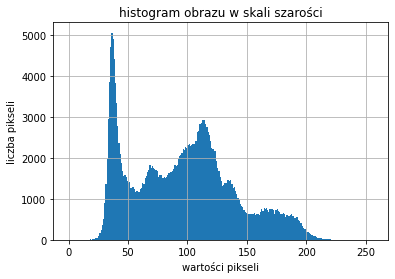

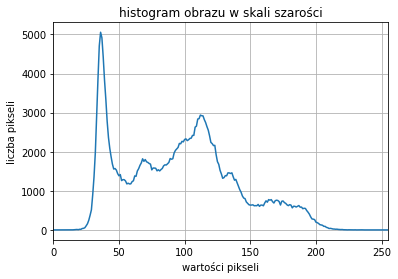

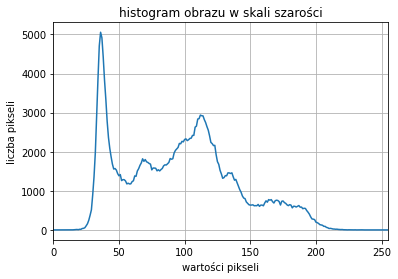

In [ ]:
#HISTOGRAM


img_lena = cv2.imread('/mydrive/lena.bmp')
img_lenag = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)
#cv2_imshow(img_lenag)
# histogram obeazu szarego
# wykorzystanie biblioteki matplotlib
plt.figure()
plt.hist(img_lenag.ravel(), 256, [0,256])
# opis wykresu
plt.title("histogram obrazu w skali szarości")
plt.xlabel("wartości pikseli")
plt.ylabel("liczba pikseli")
plt.grid(True)
# biblioteka opencv
histlena = cv2.calcHist([img_lenag], [0], None, [256], [0,256])
plt.figure()
plt.title("histogram obrazu w skali szarości")
plt.xlabel("wartości pikseli")
plt.ylabel("liczba pikseli")
plt.grid(True)
plt.plot(histlena)
plt.xlim([0,255])
plt.show()
# bibliotekla numpy
histlena2, bins = np.histogram(img_lenag.flatten(), 256, [0,256])
plt.figure()
plt.title("histogram obrazu w skali szarości")
plt.xlabel("wartości pikseli")
plt.ylabel("liczba pikseli")
plt.grid(True)
plt.plot(histlena2)
plt.xlim([0,255])
plt.show()

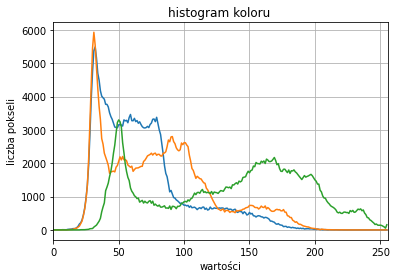

In [ ]:
# histogram dla obrazów kolorowych
chans = cv2.split(img_lena)
colors = 'b', 'g', 'r'

plt.figure() 
plt.title("histogram koloru ")
plt.xlabel("wartości")
plt.ylabel("liczba pokseli")

for (chan, color) in zip(chans, colors):
  hist = cv2.calcHist([chan], [0], None, [256], [0,256])
  plt.plot(hist)
  plt.xlim([0,256])

plt.grid(True)
plt.show()

In [ ]:
# korekcja obraz z wykorzystaniem histigramu

LookUpTable = np.zeros((256), dtype=np.uint8)

min = img_lenag.min()
max = img_lenag.max()
# print(str(min) + " " + str(max))

for i in range(256):
  LookUpTable[i] = abs((255/(max-min)) * (i-min))


img_LUT = cv2.LUT(img_lenag, LookUpTable)
#cv2_imshow(img_lenag)
#cv2_imshow(img_LUT)
res = np.hstack((img_lenag, img_LUT))
#cv2_imshow(res)

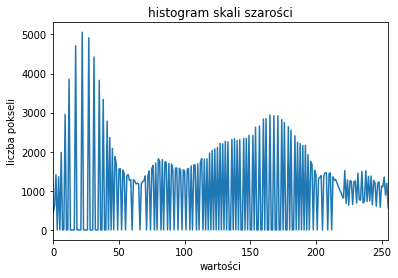

In [ ]:
# wyrównanie histogramu 
equ = cv2.equalizeHist(img_lenag)

hist = cv2.calcHist([equ], [0], None, [256], [0,256])
show_plot(hist)

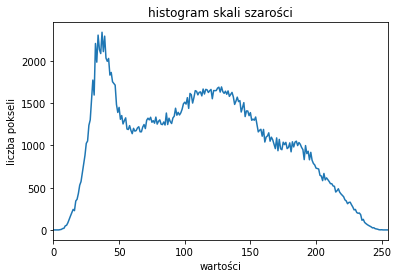

In [ ]:
# adaptacyjny histogram 

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
cv2.createCLAHE
cl1 = clahe.apply(img_lenag)

hist = cv2.calcHist([cl1], [0], None, [256], [0,256])

show_plot(hist)

res3 = np.hstack((img_lenag, cl1))
#cv2_imshow(res3)

In [ ]:
#FILTRACJA 
#Dodawanie zakłóceń do obrazu
#szum poisson


